In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/KHUSHI AGGARWAL/Downloads/Sales_data.csv')

In [3]:
df.shape

(10594, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          10557 non-null  object
 1   Product           10557 non-null  object
 2   Quantity Ordered  10557 non-null  object
 3   Price Each        10443 non-null  object
 4   Order Date        10557 non-null  object
 5   Purchase Address  10531 non-null  object
dtypes: object(6)
memory usage: 496.7+ KB


In [5]:
df.size

63564

In [6]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,NaN,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,NaN,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001"
7,222917,LG Dryer,1,600,07/17/19 13:44,"490 Adams St, New York City, NY 10001"
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001"
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001"


In [7]:
# Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in df.columns if df[col].dtype != 'object'] 
print('Numerical columns :',num_col)

Categorical columns : ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Numerical columns : []


In [8]:
df.nunique()

Order ID            10134
Product                20
Quantity Ordered       10
Price Each             18
Order Date           8765
Purchase Address     9949
dtype: int64

In [9]:
df['Quantity Ordered'].unique()

array(['1', '5', '2', '3', nan, '4', 'Quantity Ordered', '6', '7', '8',
       '9'], dtype=object)

In [10]:
df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda x: np.nan if x == 'Quantity Ordered' else x)

In [11]:
df['Quantity Ordered'].unique()

array(['1', '5', '2', '3', nan, '4', '6', '7', '8', '9'], dtype=object)

In [12]:
df['Price Each'].unique()

array(['150', '300', '3.84', nan, '99.99', '600', '11.95', '14.95',
       '379.99', '2.99', '11.99', '400', '149.99', '109.99', '999.99',
       '389.99', '1700', '700', 'Price Each'], dtype=object)

In [13]:
df['Price Each'] = df['Price Each'].apply(lambda x: np.nan if x == 'Price Each' else x)

In [14]:
df['Price Each'].unique()

array(['150', '300', '3.84', nan, '99.99', '600', '11.95', '14.95',
       '379.99', '2.99', '11.99', '400', '149.99', '109.99', '999.99',
       '389.99', '1700', '700'], dtype=object)

In [15]:
df['Order ID'].unique()

array(['222910', '222911', '222912', ..., '236667', '236668', '236669'],
      dtype=object)

In [16]:
df['Order ID'] = df['Order ID'].apply(lambda x: np.nan if x == 'Order ID' else x)

In [17]:
df['Order ID'].unique()

array(['222910', '222911', '222912', ..., '236667', '236668', '236669'],
      dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          10530 non-null  object
 1   Product           10557 non-null  object
 2   Quantity Ordered  10530 non-null  object
 3   Price Each        10416 non-null  object
 4   Order Date        10557 non-null  object
 5   Purchase Address  10531 non-null  object
dtypes: object(6)
memory usage: 496.7+ KB


In [19]:
df.isna().sum()

Order ID             64
Product              37
Quantity Ordered     64
Price Each          178
Order Date           37
Purchase Address     63
dtype: int64

In [20]:
#dropping missing values
ndf = df.dropna()

In [21]:
ndf.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [22]:
ndf.duplicated()

0        False
1        False
2        False
5        False
6        False
         ...  
10589    False
10590    False
10591    False
10592    False
10593    False
Length: 10402, dtype: bool

In [23]:
ndf.duplicated().sum()

14

In [24]:
# Remove the duplicates
ndf = ndf.drop_duplicates()

In [25]:
ndf.duplicated().sum()

0

In [26]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10388 entries, 0 to 10593
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          10388 non-null  object
 1   Product           10388 non-null  object
 2   Quantity Ordered  10388 non-null  object
 3   Price Each        10388 non-null  object
 4   Order Date        10388 non-null  object
 5   Purchase Address  10388 non-null  object
dtypes: object(6)
memory usage: 568.1+ KB


In [27]:
ndf1 = ndf.drop(columns=['Purchase Address','Order Date','Product']) 
ndf1.shape

(10388, 3)

In [28]:
# Convert the 'Price Each' column to numeric, setting errors='coerce' will replace non-numeric values with NaN
ndf1['Price Each'] = pd.to_numeric(ndf1['Price Each'], errors='coerce')

# Drop rows with NaN values in the 'Price Each' column
ndf1 = ndf1.dropna(subset=['Price Each'])

In [29]:
ndf1['Quantity Ordered'] = pd.to_numeric(ndf1['Quantity Ordered'], errors='coerce')
ndf1['Order ID'] = pd.to_numeric(ndf1['Order ID'], errors='coerce')

In [30]:
ndf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10388 entries, 0 to 10593
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          10388 non-null  int64  
 1   Quantity Ordered  10388 non-null  int64  
 2   Price Each        10388 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 324.6 KB


In [31]:
ndf1.head()

,Order ID,Quantity Ordered,Price Each
0,222910,1,150.00
1,222911,1,300.00
2,222912,1,3.84
5,222915,1,99.99
6,222916,1,600.00


In [32]:
ndf1.describe()

,Order ID,Quantity Ordered,Price Each
count,10388.000000,10388.000000,10388.000000
mean,228354.620427,1.125337,183.361015
std,3633.652925,0.466744,333.130291
min,222910.000000,1.000000,2.990000
25%,225455.750000,1.000000,11.950000
50%,227960.500000,1.000000,14.950000
75%,230466.250000,1.000000,150.000000
max,236669.000000,9.000000,1700.000000


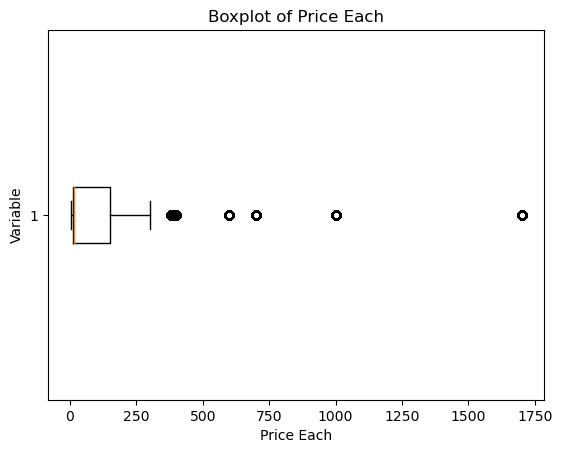

In [33]:
# Now plot the boxplot
plt.boxplot(ndf1['Price Each'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Price Each')
plt.title('Boxplot of Price Each')
plt.show()

In [34]:
mean = ndf1['Price Each'].mean() 
std  = ndf1['Price Each'].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2
  
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df2 = ndf1[(ndf1['Price Each'] >= lower_bound)  
                & (ndf1['Price Each'] <= upper_bound)]

Lower Bound : -482.8995670467874
Upper Bound : 849.6215963113233


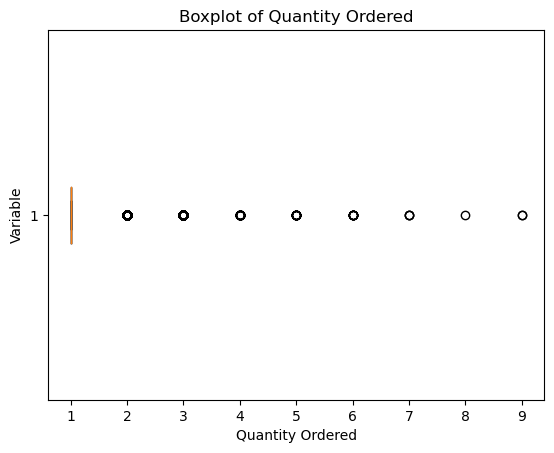

In [35]:
plt.boxplot(ndf1['Quantity Ordered'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Quantity Ordered')
plt.title('Boxplot of Quantity Ordered')
plt.show()

In [36]:
mean = ndf1['Quantity Ordered'].mean() 
std  = ndf1['Quantity Ordered'].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2
  
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df2 = ndf1[(ndf1['Quantity Ordered'] >= lower_bound)  
                & (ndf1['Quantity Ordered'] <= upper_bound)]

Lower Bound : 0.19184814953725893
Upper Bound : 2.0588257049101806


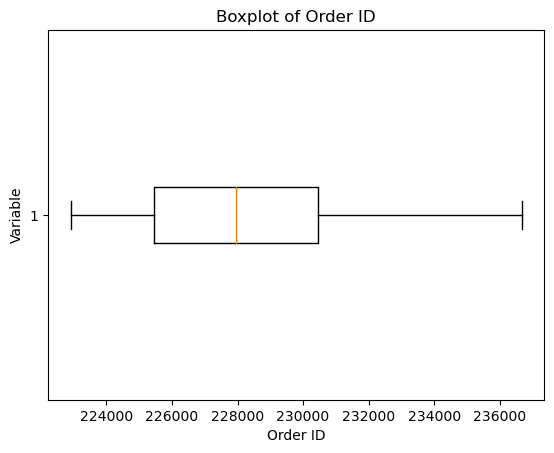

In [37]:
plt.boxplot(ndf1['Order ID'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Order ID')
plt.title('Boxplot of Order ID')
plt.show()

In [38]:
mean = ndf1['Order ID'].mean() 
std  = ndf1['Order ID'].std() 
  
# Calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2
  
print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 
  
# Drop the outliers 
df2 = ndf1[(ndf1['Order ID'] >= lower_bound)  
                & (ndf1['Order ID'] <= upper_bound)]

Lower Bound : 221087.3145765281
Upper Bound : 235621.92627830443


In [39]:
# Categorical columns 
cat_col = [col for col in ndf1.columns if ndf1[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in ndf1.columns if ndf1[col].dtype != 'object'] 
print('Numerical columns :',num_col)

Categorical columns : []
Numerical columns : ['Order ID', 'Quantity Ordered', 'Price Each']


In [40]:
df2.shape

(9332, 3)

In [41]:
df2.head()

,Order ID,Quantity Ordered,Price Each
0,222910,1,150.00
1,222911,1,300.00
2,222912,1,3.84
5,222915,1,99.99
6,222916,1,600.00


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9332 entries, 0 to 9498
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          9332 non-null   int64  
 1   Quantity Ordered  9332 non-null   int64  
 2   Price Each        9332 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 291.6 KB


# data exploration

In [45]:
mode = df2['Quantity Ordered'].mode()
median = df2['Quantity Ordered'].median()
std = df2['Quantity Ordered'].std()
mean = df2['Quantity Ordered'].mean()

print('mode is', mode)
print('median is', median)
print('standard deviation is', std)
print ('mean is' , mean)

mode is 0    1
Name: Quantity Ordered, dtype: int64
median is 1.0
standard deviation is 0.4717689681298638
mean is 1.1273039005572225


In [46]:
mode = df2['Price Each'].mode()
median = df2['Price Each'].median()
std = df2['Price Each'].std()
mean = df2['Price Each'].mean()

print('mode is', mode)
print('median is', median)
print('standard deviation is', std)
print ('mean is' , mean)

mode is 0    14.95
Name: Price Each, dtype: float64
median is 14.95
standard deviation is 329.36226779954103
mean is 181.43974389198453


In [47]:
mode = df2['Order ID'].mode()
median = df2['Order ID'].median()
std = df2['Order ID'].std()
mean = df2['Order ID'].mean()

print('mode is', mode)
print('median is', median)
print('standard deviation is', std)
print ('mean is' , mean)

mode is 0     223028
1     224780
2     225347
3     225686
4     226437
5     226625
6     226901
7     226935
8     227400
9     227401
10    227664
11    227982
12    229063
13    230024
14    235584
Name: Order ID, dtype: int64
median is 227457.5
standard deviation is 2649.2639075725947
mean is 227471.73671238747


In [48]:
df2.describe()

,Order ID,Quantity Ordered,Price Each
count,9332.000000,9332.000000,9332.000000
mean,227471.736712,1.127304,181.439744
std,2649.263908,0.471769,329.362268
min,222910.000000,1.000000,2.990000
25%,225205.750000,1.000000,11.950000
50%,227457.500000,1.000000,14.950000
75%,229704.250000,1.000000,150.000000
max,235621.000000,9.000000,1700.000000


# univariate analysis 

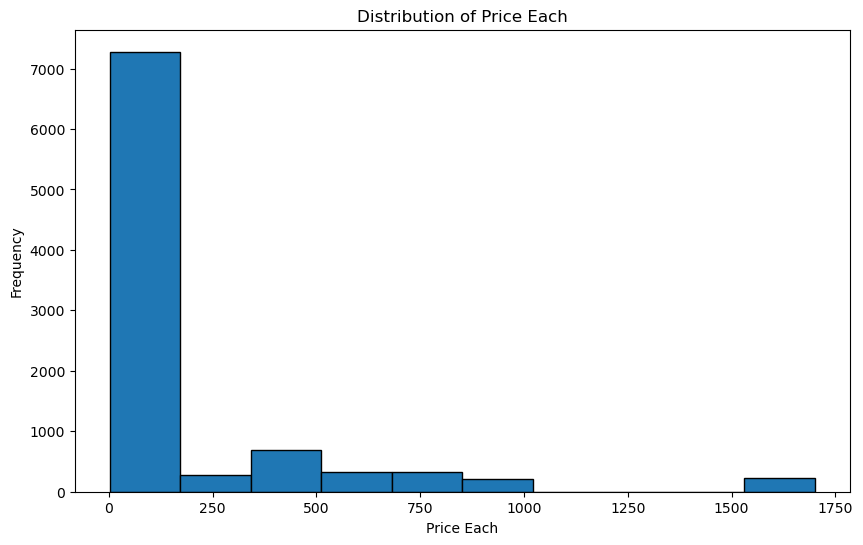

In [50]:
#histogram
plt.figure(figsize=(10, 6))
plt.hist(df2['Price Each'], bins=10, edgecolor='black')
plt.title('Distribution of Price Each')
plt.xlabel('Price Each')
plt.ylabel('Frequency')
plt.show()

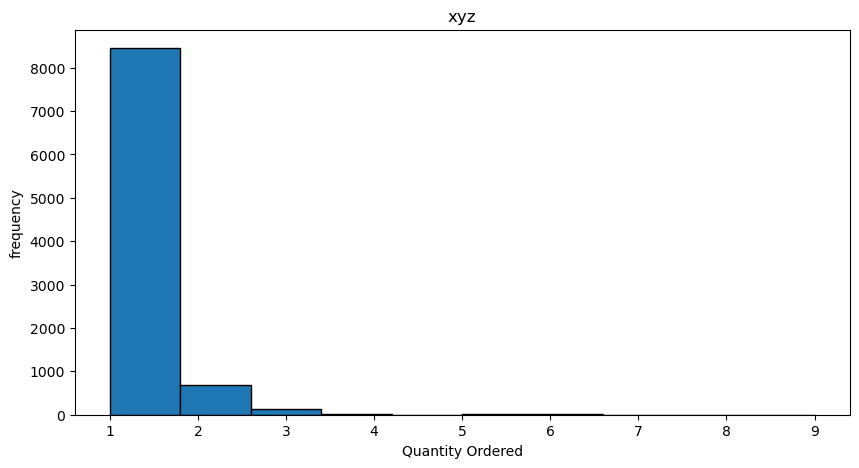

In [51]:
plt.figure(figsize = (10,5))
plt.hist(df2['Quantity Ordered'],bins=10,edgecolor='black')
plt.ylabel('frequency')
plt.xlabel('Quantity Ordered')
plt.title('xyz')
plt.show()

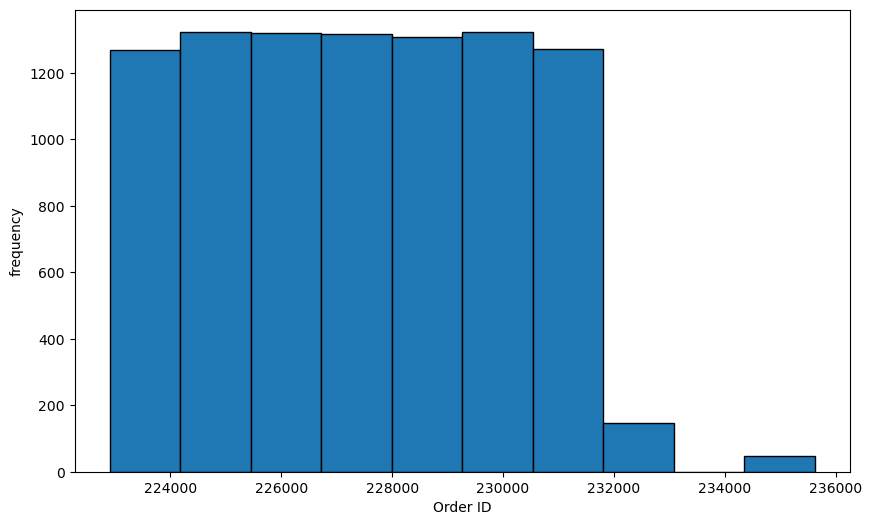

In [52]:
plt.figure(figsize = (10,6))
plt.hist(df2['Order ID'],bins=10,edgecolor='black')
plt.ylabel('frequency')
plt.xlabel('Order ID')
plt.show()

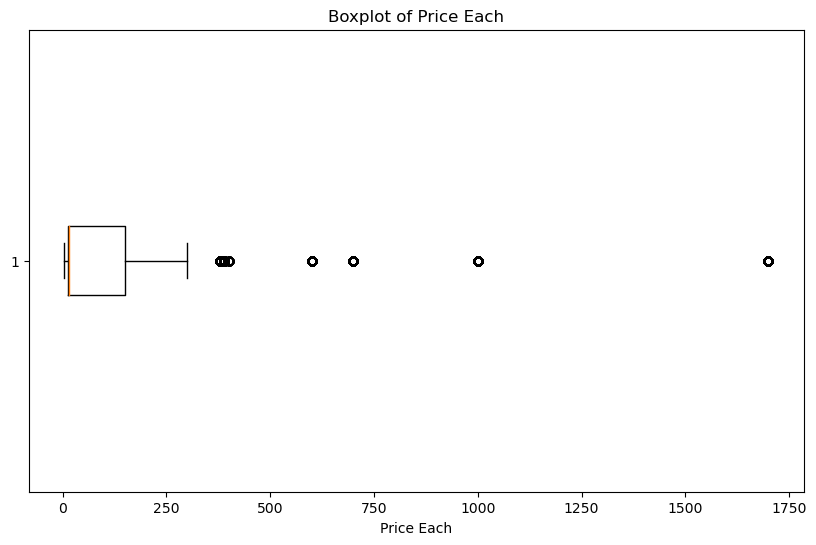

In [54]:
#boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df2['Price Each'], vert=False)
plt.title('Boxplot of Price Each')
plt.xlabel('Price Each')
plt.show()


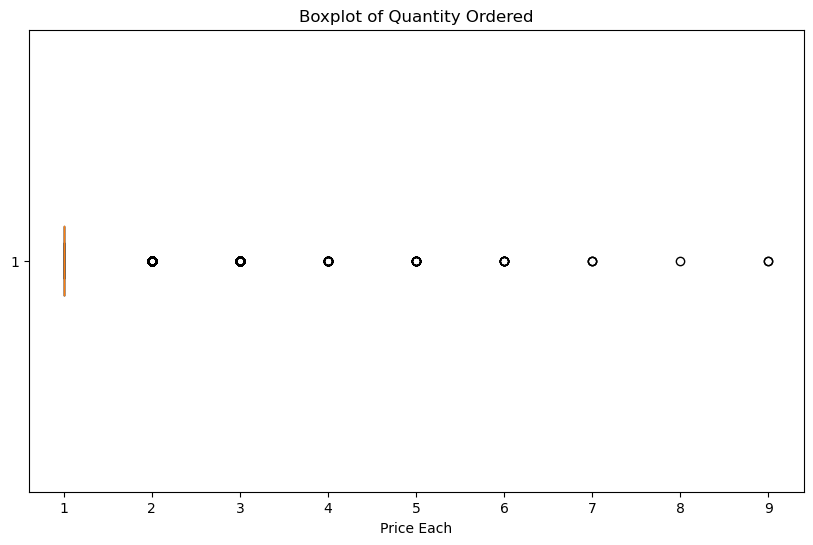

In [55]:
plt.figure(figsize = (10,6))
plt.boxplot(df2['Quantity Ordered'], vert= False)
plt.title('Boxplot of Quantity Ordered')
plt.xlabel('Price Each')
plt.show()

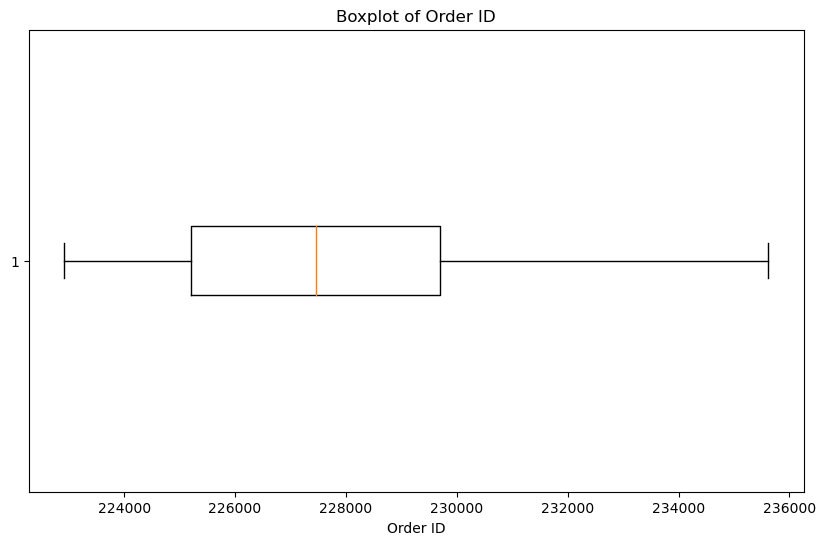

In [56]:
plt.figure(figsize = (10,6))
plt.boxplot(df2['Order ID'], vert= False)
plt.title('Boxplot of Order ID')
plt.xlabel('Order ID')
plt.show()

C:\Users\KHUSHI AGGARWAL\AppData\Local\Temp\ipykernel_31084\2564568648.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Order ID'], shade=True)


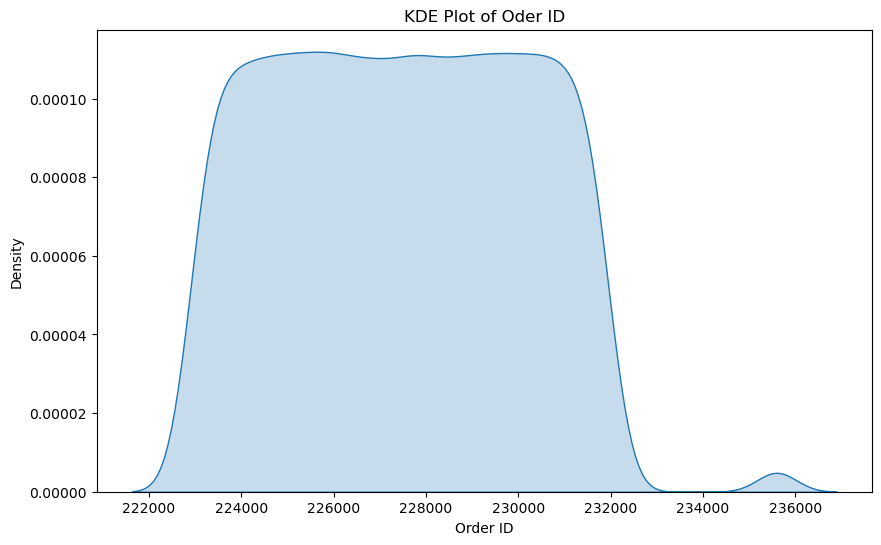

In [57]:
#kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df2['Order ID'], shade=True)
plt.title('KDE Plot of Oder ID')
plt.xlabel('Order ID')
plt.ylabel('Density')
plt.show()

C:\Users\KHUSHI AGGARWAL\AppData\Local\Temp\ipykernel_31084\3663666637.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Price Each'], shade=True)


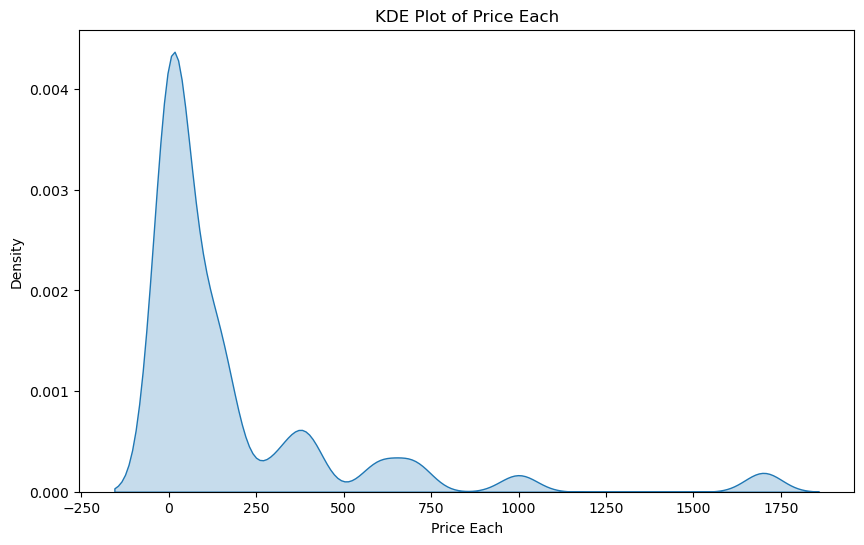

In [58]:
#kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df2['Price Each'], shade=True)
plt.title('KDE Plot of Price Each')
plt.xlabel('Price Each')
plt.ylabel('Density')
plt.show()

C:\Users\KHUSHI AGGARWAL\AppData\Local\Temp\ipykernel_31084\3228528804.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Quantity Ordered'], shade=True)


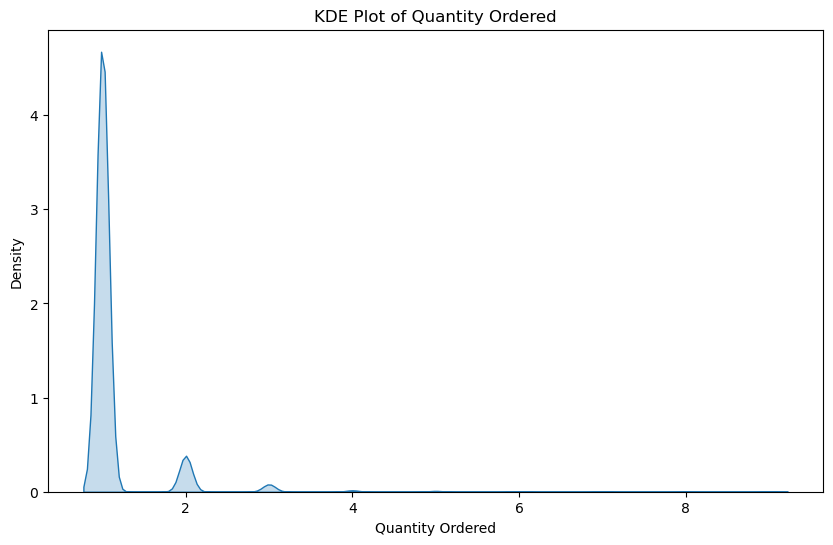

In [59]:
#kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df2['Quantity Ordered'], shade=True)
plt.title('KDE Plot of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Density')
plt.show()

# bivariate analysis

In [60]:
price_stats = df2['Price Each'].describe()
quantity_stats = df2['Quantity Ordered'].describe()

In [61]:
print("Price Each Statistics:")
print(price_stats)
print("\nQuantity Ordered Statistics:")
print(quantity_stats)

Price Each Statistics:
count    9332.000000
mean      181.439744
std       329.362268
min         2.990000
25%        11.950000
50%        14.950000
75%       150.000000
max      1700.000000
Name: Price Each, dtype: float64

Quantity Ordered Statistics:
count    9332.000000
mean        1.127304
std         0.471769
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: Quantity Ordered, dtype: float64


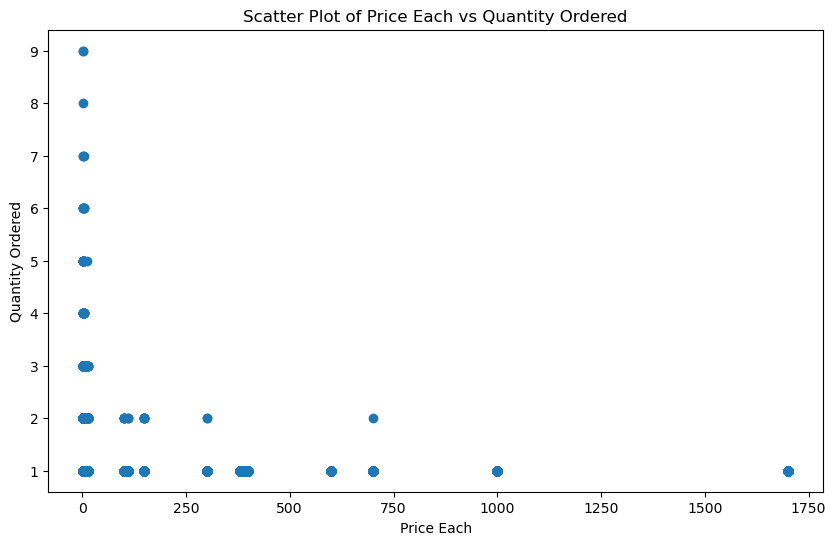

In [62]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Price Each'], df2['Quantity Ordered'])
plt.title('Scatter Plot of Price Each vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

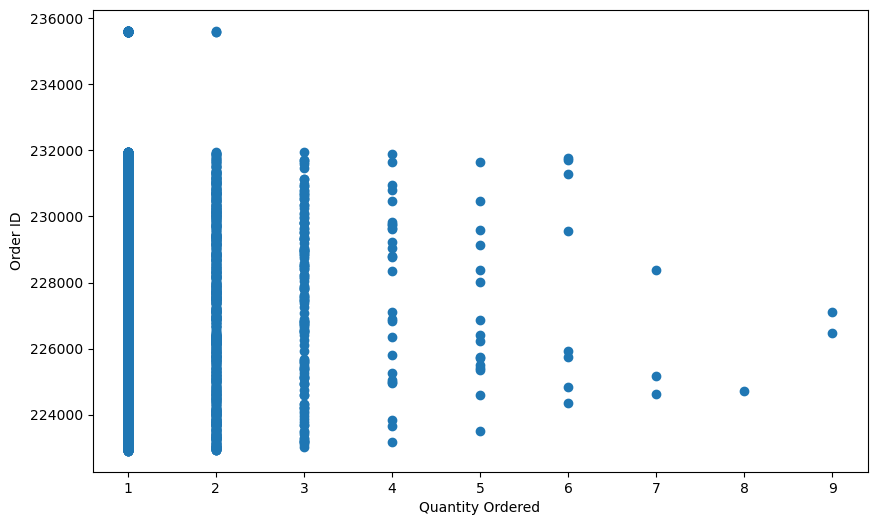

In [63]:
plt.figure(figsize = (10,6))
plt.scatter(df2['Quantity Ordered'],df2['Order ID'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Order ID')
plt.show()

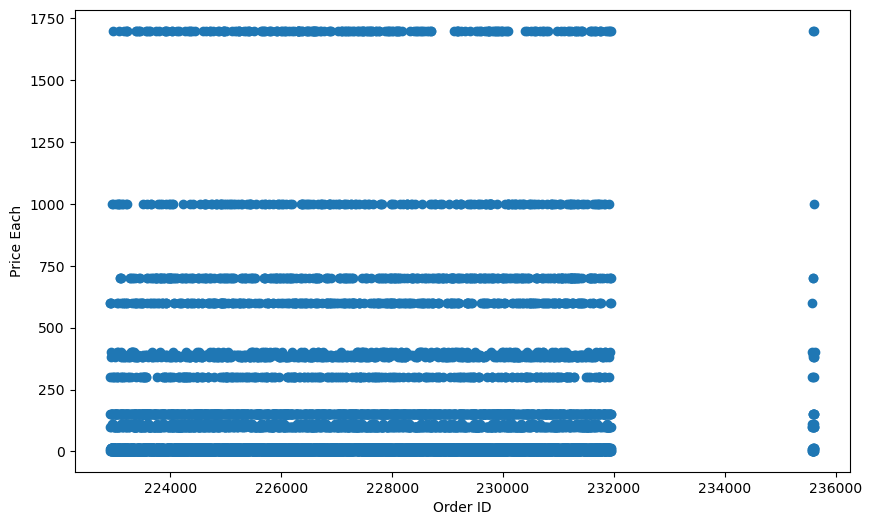

In [64]:
plt.figure(figsize = (10,6))
plt.scatter(df2['Order ID'],df2['Price Each'])
plt.xlabel('Order ID')
plt.ylabel('Price Each')
plt.show()

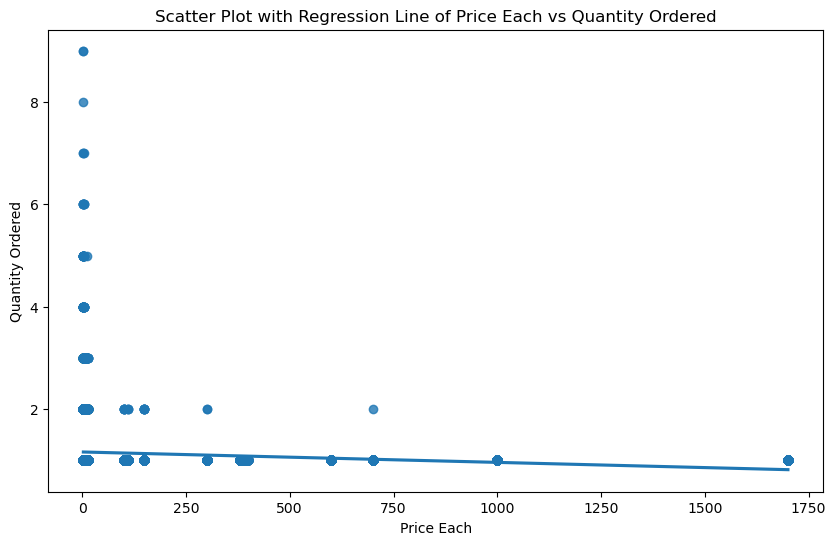

In [65]:
#scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Price Each', y='Quantity Ordered', data=df2)
plt.title('Scatter Plot with Regression Line of Price Each vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

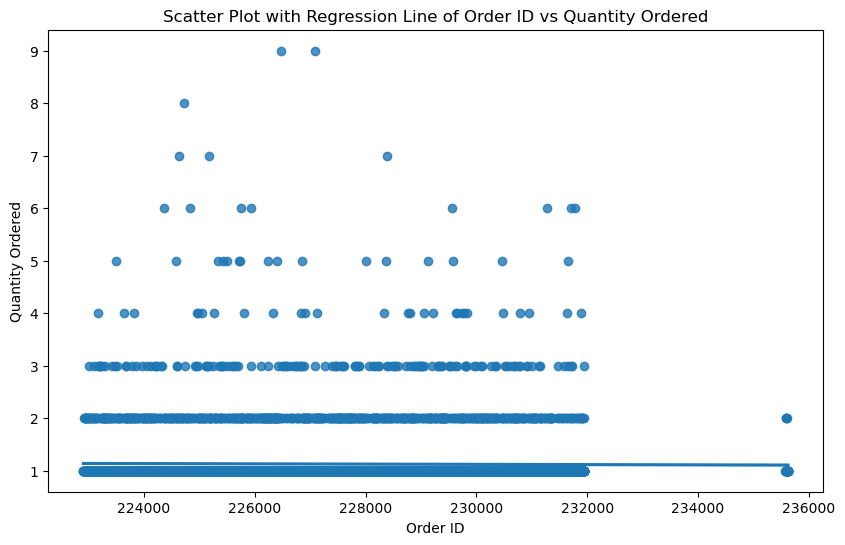

In [66]:
#scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Order ID', y='Quantity Ordered', data=df2)
plt.title('Scatter Plot with Regression Line of Order ID vs Quantity Ordered')
plt.xlabel('Order ID')
plt.ylabel('Quantity Ordered')
plt.show()

# multivariate analysis

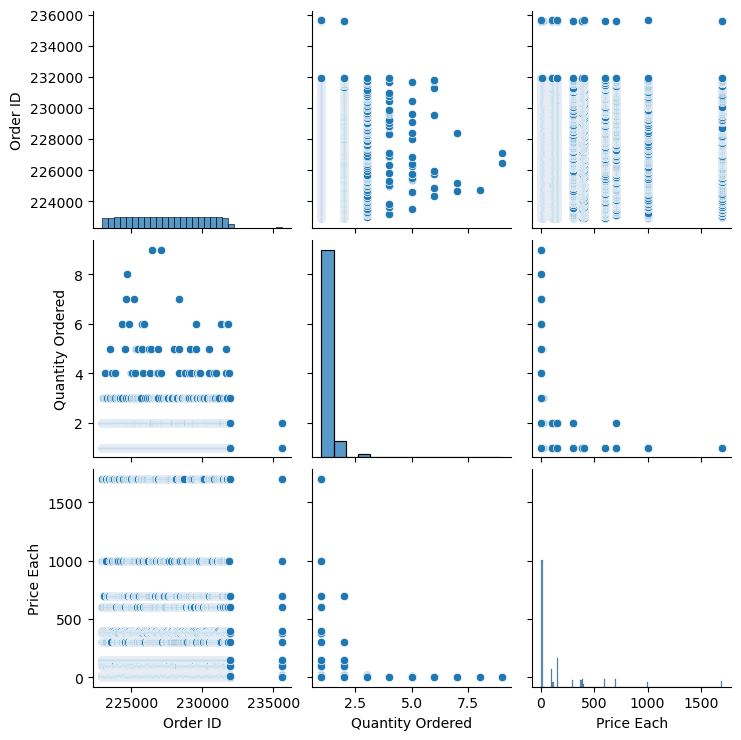

In [68]:
#pairplot
sns.pairplot(df2)
plt.show()

<Figure size 1000x600 with 0 Axes>

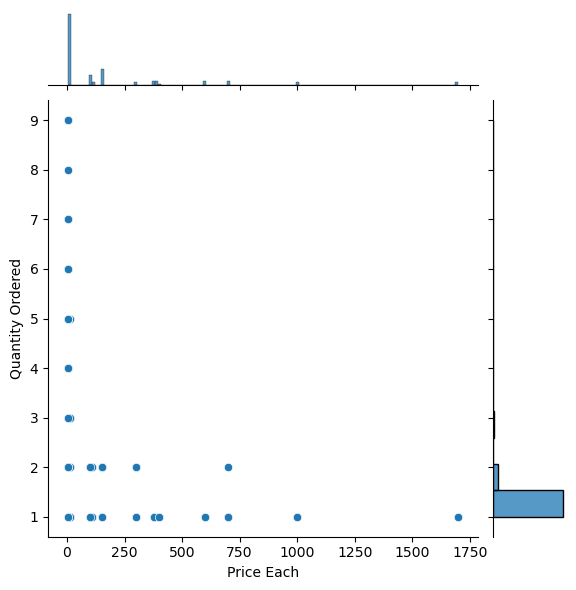

In [69]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Price Each', y='Quantity Ordered', data=df2, kind='scatter')
plt.show()

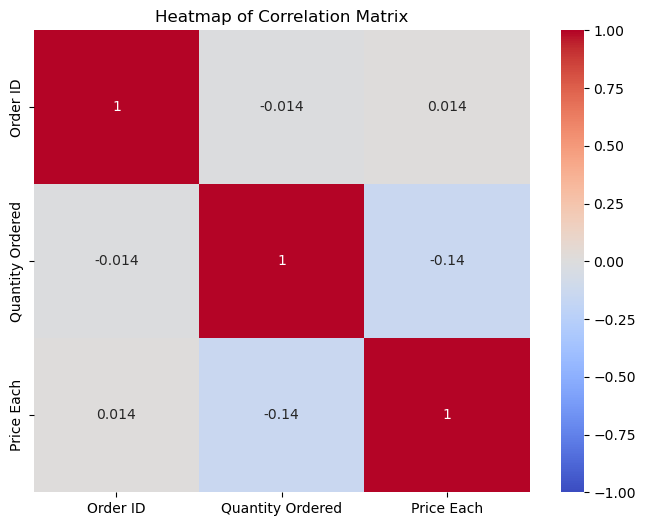

In [72]:
# Heatmap 
corr = df2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()